In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
os.chdir("D:/cboobs/creditScore-Prediction/creditScore-Prediction")

### Dataset Inspection

In [5]:
df = pd.read_csv("data/credit_FR.csv")

# creditScore-Prediction\data\credit_FR.csv

print(df.columns)
print("...............................................................................................")
print("...............................................................................................")
print(df.info())

C:\Users\HP\AppData\Local\Temp\ipykernel_7048\2618784496.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/credit_FR.csv")


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')
...............................................................................................
...............................................................................................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   

In [ ]:
#check for features whose dtype is object but can be changed to an appropriate dtype.

for col in df.describe(include='object').columns:
    print('Column Name: ',col)
    print(df[col].unique())
    print('='*60 )

Column Name:  ID
['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']
Column Name:  Customer_ID
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
Column Name:  Month
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Column Name:  Name
['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
Column Name:  Age
['23' '-500' '28_' ... '4808_' '2263' '1342']
Column Name:  SSN
['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']
Column Name:  Occupation
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Column Name:  Annual_Income
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
Column Name:  Num_of_Loan
['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464

### Deal with Duplicates and Missing Values

In [6]:
df1 = df.drop_duplicates()

In [7]:
# drop nulls following the Monthly_Inhand_Salary column

df2 = df1.dropna(subset = ['Monthly_Inhand_Salary'], axis=0)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84998 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        84998 non-null  object 
 1   Customer_ID               84998 non-null  object 
 2   Month                     84998 non-null  object 
 3   Name                      76486 non-null  object 
 4   Age                       84998 non-null  object 
 5   SSN                       84998 non-null  object 
 6   Occupation                84998 non-null  object 
 7   Annual_Income             84998 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null  float64
 9   Num_Bank_Accounts         84998 non-null  int64  
 10  Num_Credit_Card           84998 non-null  int64  
 11  Interest_Rate             84998 non-null  int64  
 12  Num_of_Loan               84998 non-null  object 
 13  Type_of_Loan              75364 non-null  object 
 14  Delay_

#### Data Cleaning by Column

In [8]:
df2.Annual_Income = df2.Annual_Income.str.strip("_")

df2.Annual_Income = pd.to_numeric(df2.Annual_Income)

df2.Annual_Income.describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_7048\912206270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Annual_Income = df2.Annual_Income.str.strip("_")
C:\Users\HP\AppData\Local\Temp\ipykernel_7048\912206270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Annual_Income = pd.to_numeric(df2.Annual_Income)


count    8.499800e+04
mean     1.767996e+05
std      1.432725e+06
min      7.005930e+03
25%      1.944141e+04
50%      3.754768e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

In [9]:
df2.Age = df2.Age.str.strip("_").astype("float64")

C:\Users\HP\AppData\Local\Temp\ipykernel_7048\868233435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Age = df2.Age.str.strip("_").astype("float64")


In [10]:
df2.Num_of_Delayed_Payment = df2.Num_of_Delayed_Payment.str.strip("_").astype("float64")

C:\Users\HP\AppData\Local\Temp\ipykernel_7048\3409890935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Num_of_Delayed_Payment = df2.Num_of_Delayed_Payment.str.strip("_").astype("float64")


In [11]:
df2.Outstanding_Debt = df2.Outstanding_Debt.str.strip("_").astype("float64")

C:\Users\HP\AppData\Local\Temp\ipykernel_7048\428164612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Outstanding_Debt = df2.Outstanding_Debt.str.strip("_").astype("float64")


In [12]:
df2.Changed_Credit_Limit = df2.Changed_Credit_Limit.str.replace("_", "0").astype("Float64")

pd.set_option('display.max_rows', 10)

df2.Changed_Credit_Limit.describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_7048\3104893683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Changed_Credit_Limit = df2.Changed_Credit_Limit.str.replace("_", "0").astype("Float64")


count      84998.0
mean     10.190295
std       6.888927
min          -6.48
25%           4.98
50%           9.28
75%          14.71
max          36.97
Name: Changed_Credit_Limit, dtype: Float64

In [13]:
df2.Amount_invested_monthly = df2.Amount_invested_monthly.str.strip("_").astype("float64")

C:\Users\HP\AppData\Local\Temp\ipykernel_7048\583741251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Amount_invested_monthly = df2.Amount_invested_monthly.str.strip("_").astype("float64")


In [14]:
df2.Num_of_Loan = df2.Num_of_Loan.str.strip("_").astype("float64")
df2.Num_of_Loan.describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_7048\1934623990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Num_of_Loan = df2.Num_of_Loan.str.strip("_").astype("float64")


count    84998.000000
mean         3.209052
std         64.301388
min       -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1496.000000
Name: Num_of_Loan, dtype: float64

In [15]:
df2.Monthly_Balance = df2.Monthly_Balance.str.strip("_").astype("float64")
df2.Num_of_Loan.describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_7048\3879126855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Monthly_Balance = df2.Monthly_Balance.str.strip("_").astype("float64")


count    84998.000000
mean         3.209052
std         64.301388
min       -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1496.000000
Name: Num_of_Loan, dtype: float64

In [16]:
df2.Amount_invested_monthly = df2.Amount_invested_monthly.astype("float64")

C:\Users\HP\AppData\Local\Temp\ipykernel_7048\2569599500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Amount_invested_monthly = df2.Amount_invested_monthly.astype("float64")


In [17]:
#check for features whose dtype is object but can be changed to an appropriate dtype.

for col in df2.describe(include='object').columns:
    print('Column Name: ',col)
    print(df2[col].unique())
    print('='*60 )

Column Name:  ID
['0x1602' '0x1606' '0x1608' ... '0x25feb' '0x25fec' '0x25fed']
Column Name:  Customer_ID
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
Column Name:  Month
['January' 'May' 'July' 'August' 'February' 'March' 'June' 'April']
Column Name:  Name
['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
Column Name:  SSN
['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']
Column Name:  Occupation
['Scientist' 'Unknown' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Column Name:  Type_of_Loan
['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal

In [17]:
df2.Occupation = df2.Occupation.str.replace('_______', "Unknown")
df2.Type_of_Loan = df2.Type_of_Loan.fillna("Not Specified")
df2.Credit_Mix = df2.Credit_Mix.str.replace('_', "Unknown")
df2.Credit_History_Age = df2.Credit_History_Age.fillna("Unknown")
df2.Payment_Behaviour = df2.Payment_Behaviour.str.replace('!@9#%8', "Unknown")

C:\Users\HP\AppData\Local\Temp\ipykernel_7048\1474801761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Occupation = df2.Occupation.str.replace('_______', "Unknown")
C:\Users\HP\AppData\Local\Temp\ipykernel_7048\1474801761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Type_of_Loan = df2.Type_of_Loan.fillna("Not Specified")
C:\Users\HP\AppData\Local\Temp\ipykernel_7048\1474801761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84998 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        84998 non-null  object 
 1   Customer_ID               84998 non-null  object 
 2   Month                     84998 non-null  object 
 3   Name                      84998 non-null  object 
 4   Age                       84998 non-null  float64
 5   SSN                       84998 non-null  object 
 6   Occupation                84998 non-null  object 
 7   Annual_Income             84998 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null  float64
 9   Num_Bank_Accounts         84998 non-null  int64  
 10  Num_Credit_Card           84998 non-null  int64  
 11  Interest_Rate             84998 non-null  int64  
 12  Num_of_Loan               84998 non-null  float64
 13  Type_of_Loan              84998 non-null  object 
 14  Delay_

In [18]:
# fillna in Name with help of Customer_ID

df2["Name"] = df2.groupby("Customer_ID")["Name"].transform("first")

C:\Users\HP\AppData\Local\Temp\ipykernel_7048\3926295189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Name"] = df2.groupby("Customer_ID")["Name"].transform("first")


In [19]:
#drop all null values

pd.set_option("display.max_rows", 10)

df3 = df2.dropna()

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71924 entries, 0 to 98303
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        71924 non-null  object 
 1   Customer_ID               71924 non-null  object 
 2   Month                     71924 non-null  object 
 3   Name                      71924 non-null  object 
 4   Age                       71924 non-null  float64
 5   SSN                       71924 non-null  object 
 6   Occupation                71924 non-null  object 
 7   Annual_Income             71924 non-null  float64
 8   Monthly_Inhand_Salary     71924 non-null  float64
 9   Num_Bank_Accounts         71924 non-null  int64  
 10  Num_Credit_Card           71924 non-null  int64  
 11  Interest_Rate             71924 non-null  int64  
 12  Num_of_Loan               71924 non-null  float64
 13  Type_of_Loan              71924 non-null  object 
 14  Delay_

In [21]:
#save the cleaned dataframe to data folder.

df3.to_csv("data/cleaned_credit_FR.csv", index=False)

In [ ]:
# create a new dataframe df4 with Age between 18 and 60

df4 = df3[(df3["Age"] >= 18) & (df3["Age"] <= 60)]



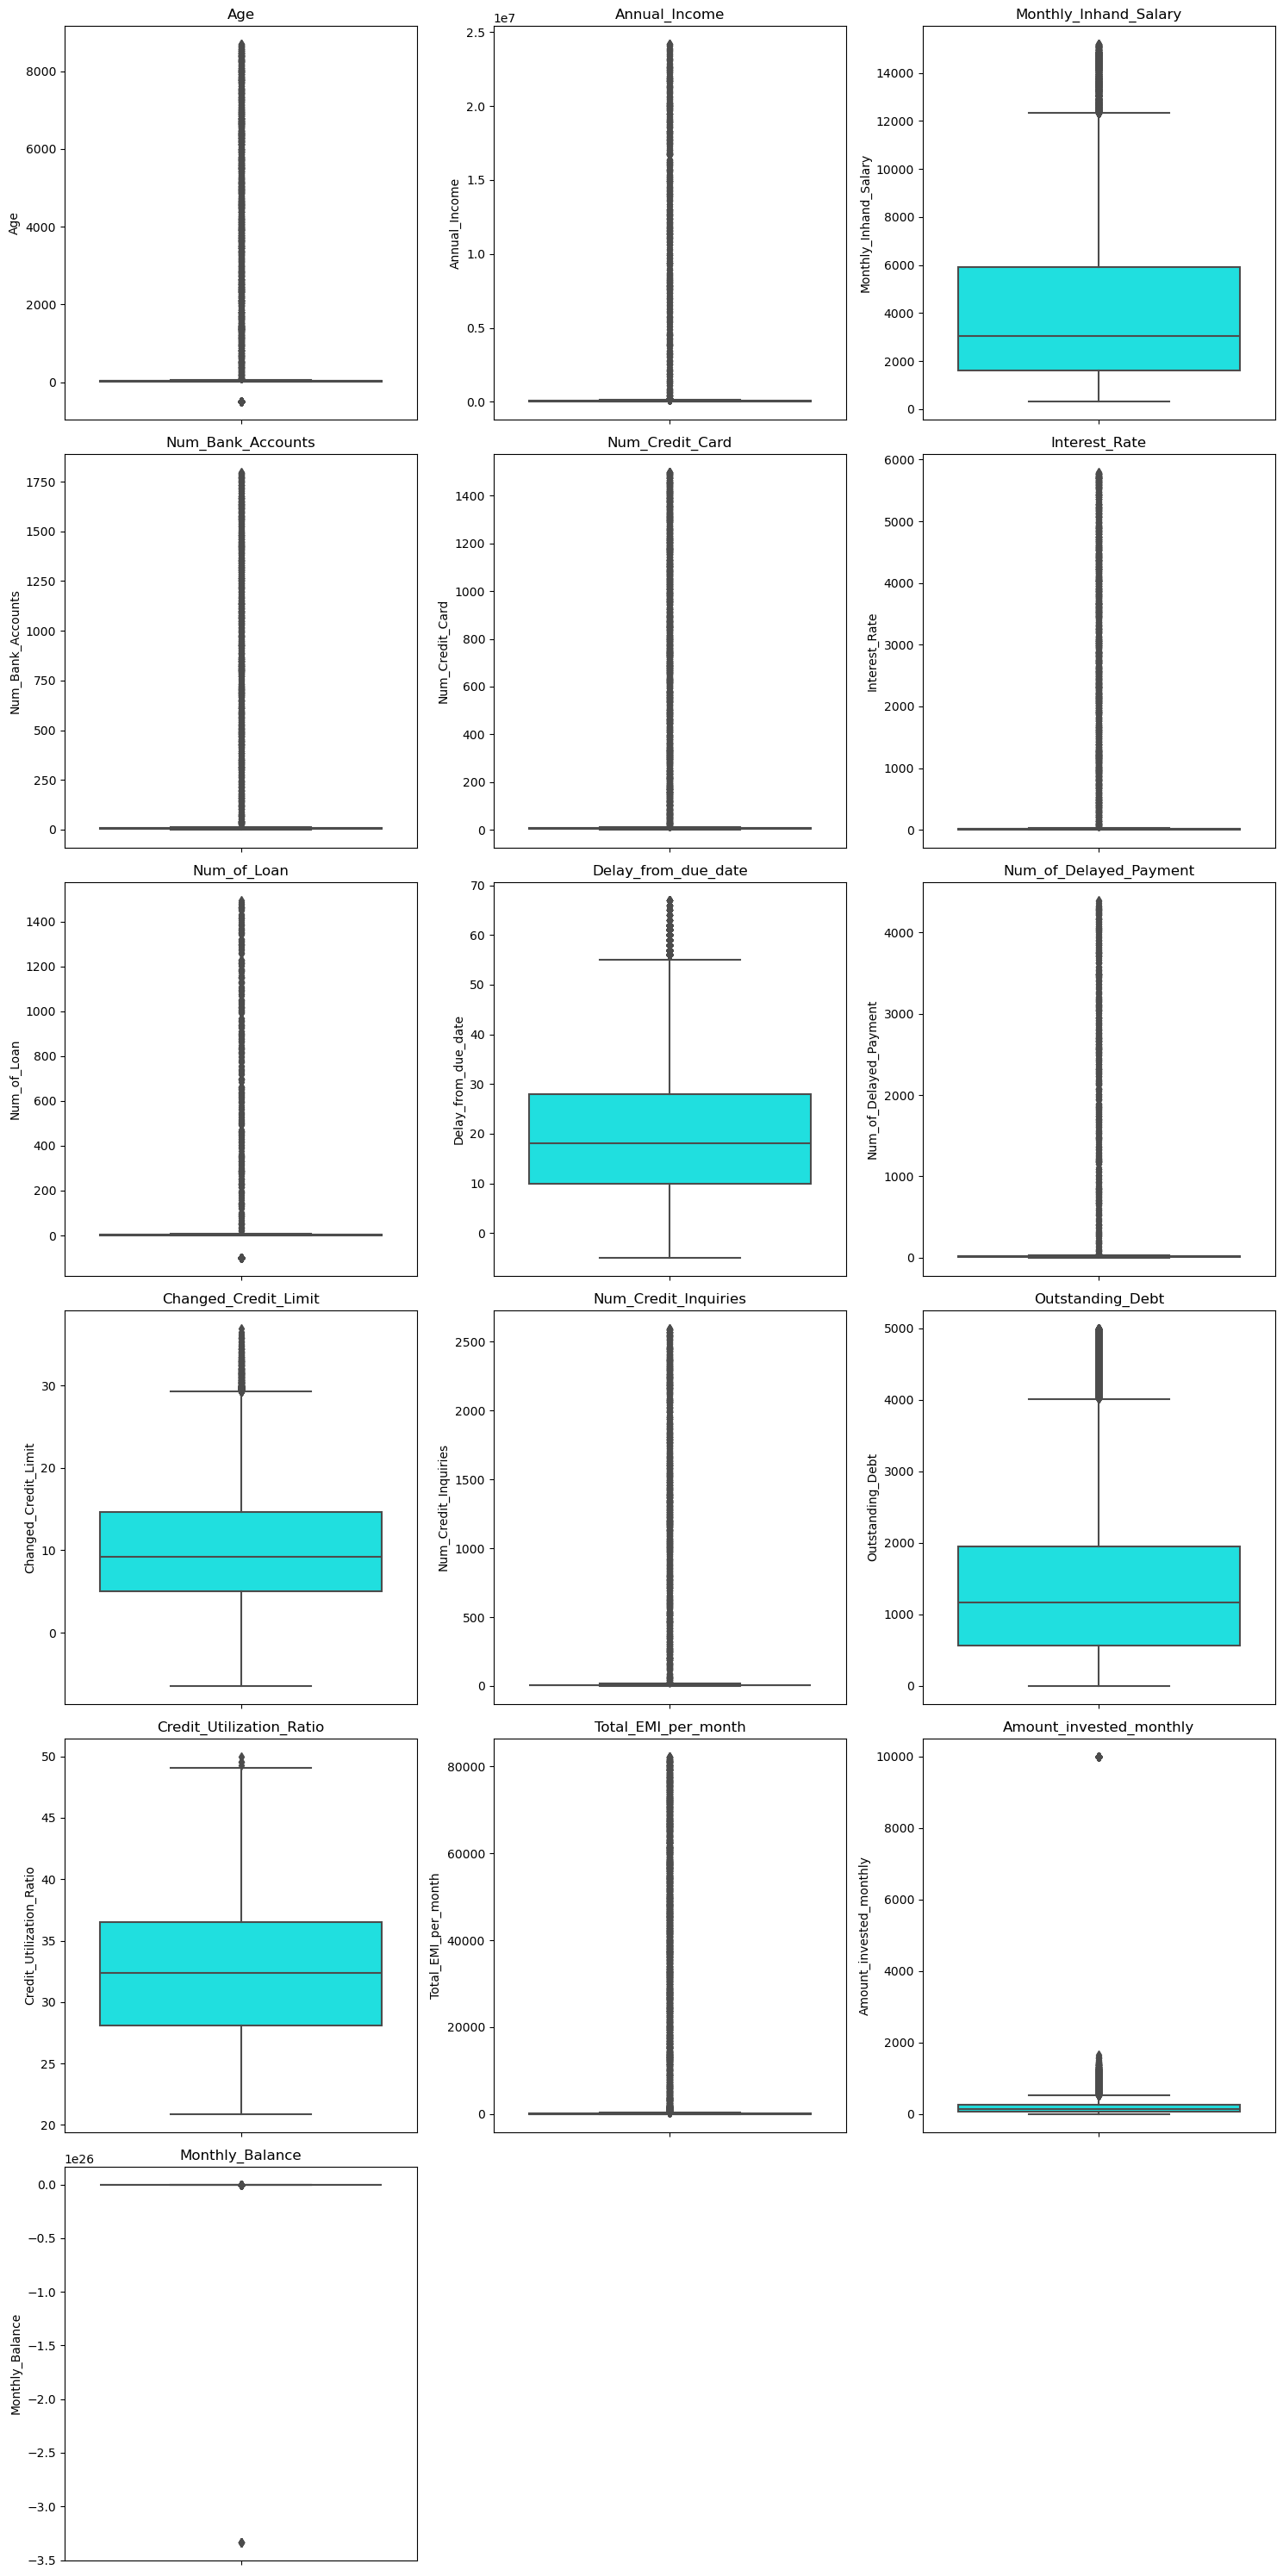

In [49]:
# Select the numeric columns robustly

N = len(df4.select_dtypes(include=['Float64', 'float64', 'int64']).columns)

# Determine the dynamic layout
N_COLS = 3
N_ROWS = math.ceil(N / N_COLS)

# Adjust figure size based on the number of rows for better visualization
plt.figure(figsize=(15, N_ROWS * 5)) 

for i, col in enumerate(df4.select_dtypes(include=['Float64', 'float64', 'int64']).columns):
    
    plt.subplot(N_ROWS, N_COLS, i + 1)
    sns.boxplot(y=df3[col], color='cyan') 
    plt.title(col)

plt.tight_layout()
plt.savefig("visuals/Boxplots for the different Numeric Features.png")

C:\Users\HP\AppData\Local\Temp\ipykernel_7048\2908553274.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df4.corr())
C:\Users\HP\AppData\Local\Temp\ipykernel_7048\2908553274.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df4.corr(), annot = True, mask = matrix)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


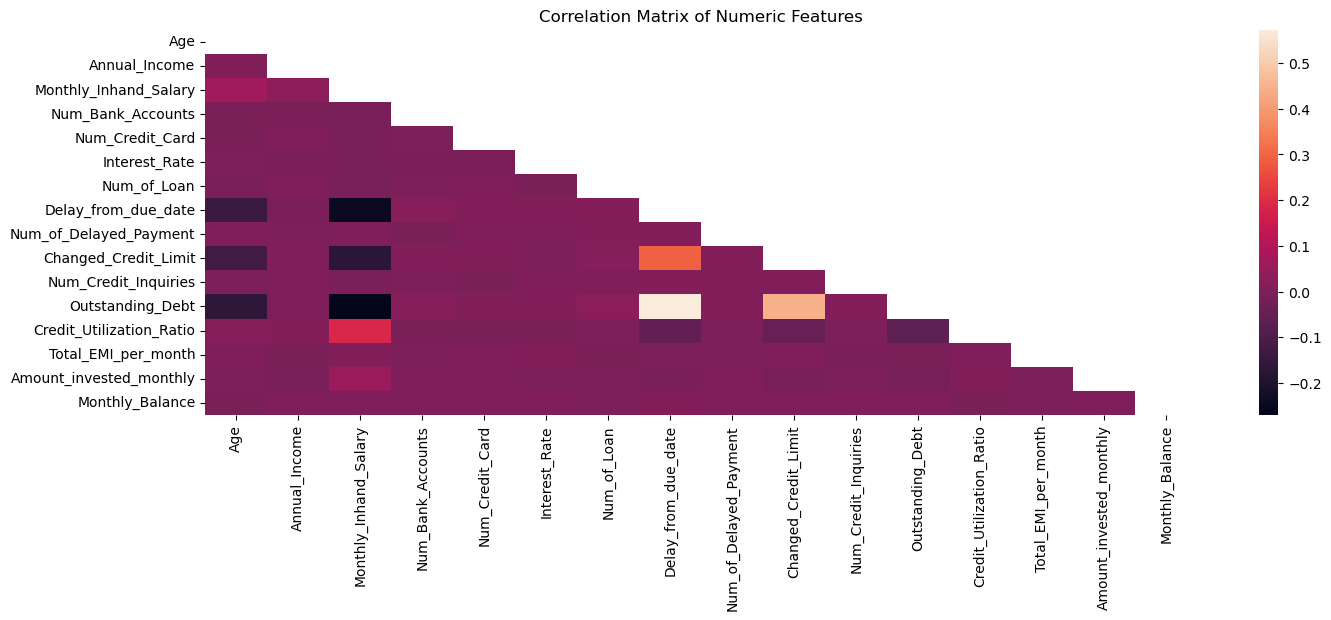

In [50]:
# Finding out if there is multicorlinearity in my input variables

matrix = np.triu(df4.corr())

plt.figure(figsize = (16, 5))
sns.heatmap(df4.corr(), annot = True, mask = matrix)
plt.title("Correlation Matrix of Numeric Features")
plt.savefig("visuals/Correlation Matrix of Numeric Features.png")

In [51]:
# Correlation Matrix shows no high correlation between input variables.

pd.set_option("display.max_rows", None)

df4.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_7048\2157015997.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df4.corr()


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.000000,0.003774,0.067054,-0.003638,-0.005037,-0.001021,-0.007242,-0.139295,0.000460,-0.122497,-0.001803,-0.166102,0.017917,0.002164,-0.002261,-0.005435
Annual_Income,0.003774,1.000000,0.028585,-0.003237,0.002555,-0.006437,0.001658,-0.008068,-0.001090,0.001904,0.000492,0.000353,0.012033,-0.004865,-0.007416,0.000866
Monthly_Inhand_Salary,0.067054,0.028585,1.000000,-0.010292,-0.006896,-0.009546,-0.009734,-0.248149,0.002520,-0.173021,-0.009387,-0.269501,0.185903,0.009308,0.055300,0.000704
Num_Bank_Accounts,-0.003638,-0.003237,-0.010292,1.000000,-0.000237,-0.003425,-0.002935,0.018430,-0.003635,0.012764,-0.001827,0.017809,-0.005455,-0.001366,0.001829,0.001010
Num_Credit_Card,-0.005037,0.002555,-0.006896,-0.000237,1.000000,-0.004314,0.002527,0.010010,0.002685,0.003642,-0.005787,0.007739,-0.003018,0.000553,0.000624,0.001224
Interest_Rate,-0.001021,-0.006437,-0.009546,-0.003425,-0.004314,1.000000,-0.005923,0.009378,0.001959,-0.000267,0.001153,0.008450,-0.003042,0.003966,-0.001073,0.001237
Num_of_Loan,-0.007242,0.001658,-0.009734,-0.002935,0.002527,-0.005923,1.000000,0.012408,0.007792,0.014812,0.000577,0.026584,-0.002092,-0.003268,-0.001496,-0.000042
Delay_from_due_date,-0.139295,-0.008068,-0.248149,0.018430,0.010010,0.009378,0.012408,1.000000,0.010160,0.290851,0.009772,0.572780,-0.058760,-0.002004,-0.006892,0.005710
Num_of_Delayed_Payment,0.000460,-0.001090,0.002520,-0.003635,0.002685,0.001959,0.007792,0.010160,1.000000,0.007904,0.004273,0.009506,-0.000521,0.000251,0.002111,0.000980
Changed_Credit_Limit,-0.122497,0.001904,-0.173021,0.012764,0.003642,-0.000267,0.014812,0.290851,0.007904,1.000000,0.004528,0.444751,-0.043937,0.001189,-0.010928,0.001593


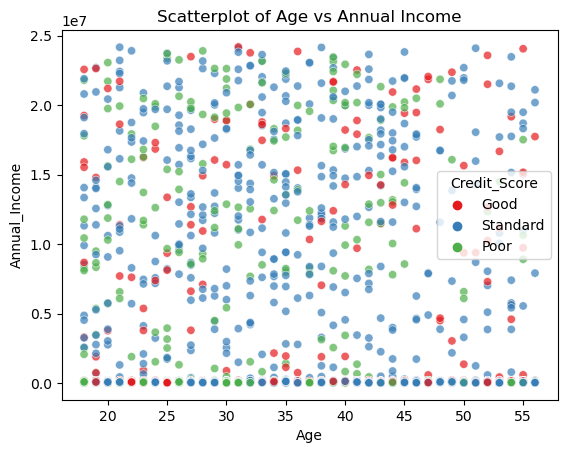

In [52]:
pd.set_option("display.max_rows", 10)

sns.scatterplot(data=df4, x="Age", y="Annual_Income", 
                hue="Credit_Score",  
                alpha=0.7, palette="Set1", legend="full")
plt.title("Scatterplot of Age vs Annual Income")
plt.savefig("visuals/Scatterplot showing Age vs Annual Income.png")

In [28]:
df3.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [53]:
df4['Age'].value_counts()


28.0    2154
38.0    2130
26.0    2113
31.0    2108
35.0    2087
        ... 
50.0     928
51.0     925
54.0     923
47.0     896
56.0     247
Name: Age, Length: 39, dtype: int64

In [43]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69897 entries, 0 to 98303
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        69897 non-null  object 
 1   Customer_ID               69897 non-null  object 
 2   Month                     69897 non-null  object 
 3   Name                      69897 non-null  object 
 4   Age                       69897 non-null  float64
 5   SSN                       69897 non-null  object 
 6   Occupation                69897 non-null  object 
 7   Annual_Income             69897 non-null  float64
 8   Monthly_Inhand_Salary     69897 non-null  float64
 9   Num_Bank_Accounts         69897 non-null  int64  
 10  Num_Credit_Card           69897 non-null  int64  
 11  Interest_Rate             69897 non-null  int64  
 12  Num_of_Loan               69897 non-null  float64
 13  Type_of_Loan              69897 non-null  object 
 14  Delay_

In [54]:
#check for features whose dtype is object but can be changed to an appropriate dtype.

for col in df4.describe(include='object').columns:
    print('Column Name: ',col)
    print(df4[col].unique())
    print('='*60 )

Column Name:  ID
['0x1602' '0x1608' '0x1609' ... '0x255fa' '0x255fb' '0x255fd']
Column Name:  Customer_ID
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xb80d' 'CUS_0xa407'
 'CUS_0x9d41']
Column Name:  Month
['January' 'July' 'August' 'February' 'March' 'May' 'June' 'April']
Column Name:  Name
['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Kazunorig' 'Alex Frewt'
 'Rothackerz']
Column Name:  SSN
['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '713-24-3856' '354-91-6159'
 '979-38-2855']
Column Name:  Occupation
['Scientist' 'Unknown' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Column Name:  Type_of_Loan
['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Not Specified, Debt Consolidation Loan, Debt Consolidation Loan, Home Equity Loan, Mortgage Loan, Credit-Builder Loan, Payday L

In [58]:
df4['Type_of_Loan'].nunique()

5697

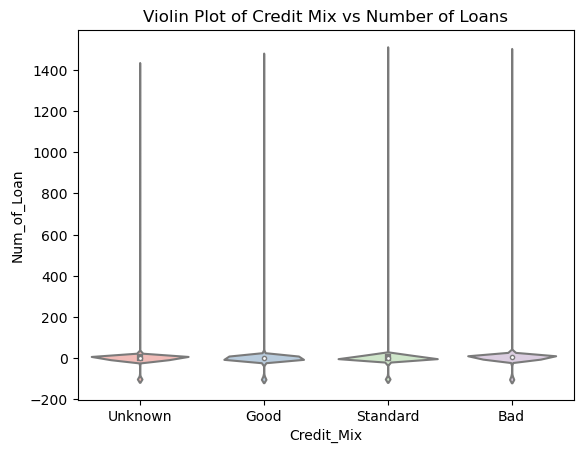

In [57]:
sns.violinplot(data=df4, x='Credit_Mix', y='Num_of_Loan', palette='Pastel1')
plt.title("Violin Plot of Credit Mix vs Number of Loans")
plt.savefig("visuals/Violin Plot of Credit Mix vs Number of Loans.png")

In [67]:
df4.describe(include='object').columns

Index(['Month', 'SSN', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [ ]:
df4.drop(columns=["ID",'Customer_ID', 'Name', 'Type_of_Loan', 'Credit_History_Age', "SSN"], axis=1, inplace=True )

KeyError: "['ID', 'Customer_ID', 'Name', 'Type_of_Loan', 'Credit_History_Age'] not found in axis"

In [71]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65762 entries, 0 to 98303
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     65762 non-null  object 
 1   Age                       65762 non-null  float64
 2   Occupation                65762 non-null  object 
 3   Annual_Income             65762 non-null  float64
 4   Monthly_Inhand_Salary     65762 non-null  float64
 5   Num_Bank_Accounts         65762 non-null  int64  
 6   Num_Credit_Card           65762 non-null  int64  
 7   Interest_Rate             65762 non-null  int64  
 8   Num_of_Loan               65762 non-null  float64
 9   Delay_from_due_date       65762 non-null  int64  
 10  Num_of_Delayed_Payment    65762 non-null  float64
 11  Changed_Credit_Limit      65762 non-null  Float64
 12  Num_Credit_Inquiries      65762 non-null  float64
 13  Credit_Mix                65762 non-null  object 
 14  Outsta

In [70]:
df4.drop(["SSN"], axis=1, inplace=True )

C:\Users\HP\AppData\Local\Temp\ipykernel_7048\1198848976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(["SSN"], axis=1, inplace=True )


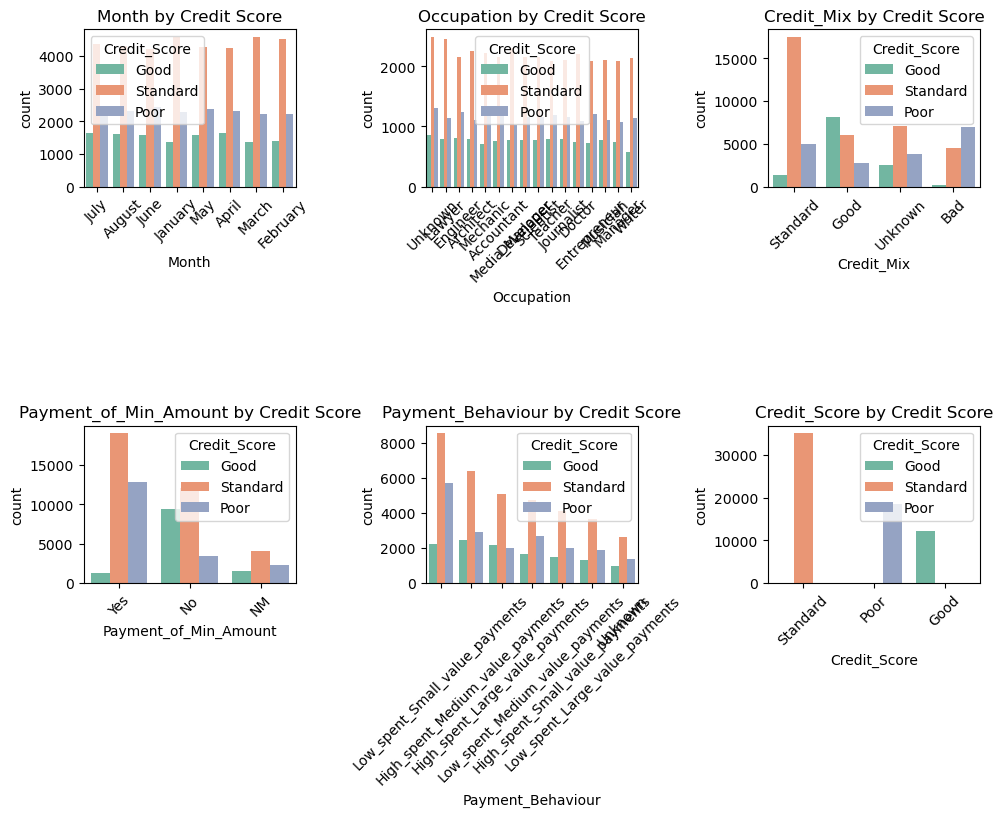

In [76]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(df4.describe(include='object').columns):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df4, x=col, hue="Credit_Score", palette='Set2', order=df4[col].value_counts().index)
    plt.title(f"{col} by Credit Score")
    plt.xticks(rotation=45)
    plt.savefig(f"visuals/Count Plot of Categorical Features by Credit Score.png")

plt.tight_layout()

In [77]:
df4.to_csv("data/cleaned_credit_FR_age_18_60.csv", index=False)